*Please name your Example notebook as transparently as possible. Feel free to add a description of the workflow's goal. [Remove this line when creating your example]*

# Example Notebook Template file 

**Author of this template** : Michèle Masson-Trottier [Remove this line when creating your example]

**Author**: 
*Include the name of all authors of the workflow showcased in the example notebook*.

### Citation:
*Please include the citations for all tools, software, and publications referenced in the workflow. If you are basing your workflow on another previously published example notebook, please cite the name and DOI.*

#### Tools included in this workflow
*Cite the tools based on their preferred method (example through a Zenodo DOI or a publication)*

#### Workflows this work is based on (if applicable)
*If you started from another published workflow, please cite it here*

#### Publications
*Any publication that helped you build your example should be cited here*

#### Educational resources
*Any educational resource (for example Andy's Brain Book, FSL tutorials...) should be cited here.*

#### Dataset
*Please cite the database and dataset used in your example*

#### Output CPU information

In [1]:
!cat /proc/cpuinfo | grep 'vendor' | uniq
!cat /proc/cpuinfo | grep 'model name' | uniq

vendor_id	: GenuineIntel
model name	: Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz


## Load software tools and import python libraries

Please have a bloc for loading the different modules needed for your example. If you can not find all the required tools in Neurodesk, feel free to add tools using the web-based GUI https://www.neurodesk.org/neurocontainers-ui/

In [2]:
#load FSL 6.0.4
import module
await module.load('fsl/6.0.4')
await module.list()

['fsl/6.0.4']

Please consult the python packages included in the base image [see list here](https://github.com/neurodesk/neurodesktop/blob/main/Dockerfile). If you are using python packages different than these, be sure to `pip install` them in the workflow.

In [3]:
%%capture 
!pip install pydicom

In [4]:
# Import the necessary libraries
import pydicom # Library to work with DICOM files
import matplotlib.pyplot as plt # Plotting library for displaying images
import os # Standard library to interact with the filesystem

## Data preparation
*Please indicate clearly where the data is sourced. In this template, there's an example for Datalad and OSF*

### Datalad

In [3]:
%%bash

# Install the dataset from GitHub using DataLad. 
# Replace the URL with the one corresponding to the OpenNeuro dataset you want to use.
datalad install https://github.com/OpenNeuroDatasets/ds000102.git 

# Navigate into the dataset directory. 
# This should match the name of the dataset repository.
cd ds000102

# Optional: List available subjects
ls -d sub-*

# Download data for a specific subject (e.g., sub-08).
# You can change the subject ID to the one you're interested in.
datalad get sub-08

[INFO] Attempting a clone into /neurodesktop-storage/ds000102 
://github.com/OpenNeuroDatasets/ds000102.git to /neurodesktop-storage/ds000102 
[INFO] Start enumerating objects 
[INFO] Start counting objects 
[INFO] Start compressing objects 
[INFO] Start receiving objects 
[INFO] Start resolving deltas 
[INFO] Completed clone attempts for Dataset(/neurodesktop-storage/ds000102) 
[INFO] Filesystem allows writing to files whose write bit is not set. 
[INFO] Detected a crippled filesystem. 
[INFO] Disabling core.symlinks. 
[INFO] Entering an adjusted branch where files are unlocked as this filesystem does not support locked files. 
[INFO] Switched to branch 'adjusted/master(unlocked)' 
[INFO] Remote origin not usable by git-annex; setting annex-ignore 
[INFO] https://github.com/OpenNeuroDatasets/ds000102.git/config download failed: Not Found 
[INFO] access to 1 dataset sibling s3-PRIVATE not auto-enabled, enable with:
 "/neurodesktop-storage/ds000102" enable -s s3-PRIVATE 


install(ok): /neurodesktop-storage/ds000102 (dataset)
sub-01
sub-02
sub-03
sub-04
sub-05
sub-06
sub-07
sub-08
sub-09
sub-10
sub-11
sub-12
sub-13
sub-14
b-15
sub-16
sub-17
sub-18
sub-19
sub-20
sub-21
sub-22
sub-23
sub-24
sub-25
sub-26
get(ok): sub-08/anat/sub-08_T1w.nii.gz (file) [from s3-PUBLIC...]
get(ok): sub-08/func/sub-08_task-flanker_run-1_bold.nii.gz (file) [from s3-PUBLIC...]
8/func/sub-08_task-flanker_run-2_bold.nii.gz (file) [from s3-PUBLIC...]
get(ok): sub-08 (directory)
action summary:
  get (ok: 4)


### OSF

In [5]:
# Use the OSF client to clone the contents of the OSF project with ID 'ru43c' into the current directory
# The output is suppressed for cleaner display using > /dev/null 2>&1
!osf -p ru43c clone . > /dev/null 2>&1

# Extract the contents of the downloaded tar archive, which contains DICOM files
!tar xf osfstorage/dicoms-unsorted.tar

# Remove the now-unneeded 'osfstorage' directory to keep things tidy
!rm -rf osfstorage/

# Display the top of the folder tree for the extracted DICOM files (limited with `head` to avoid overwhelming output)
!tree dicoms-unsorted | head

# Print a count of how many unsorted DICOM files were extracted
!echo -e "...\nThere are `ls dicoms-unsorted | wc -l` unsorted DICOMs in ./dicoms-unsorted/"

dicoms-unsorted
├── MR.1.1.dcm
├── MR.1.10.dcm
├── MR.1.100.dcm
├── MR.1.101.dcm
├── MR.1.102.dcm
├── MR.1.103.dcm
├── MR.1.104.dcm
├── MR.1.105.dcm
├── MR.1.106.dcm
...
There are 1216 unsorted DICOMs in ./dicoms-unsorted/


### Visualisation of a dicom (one method for example)

Patient ID: 1
Modality: MR
Study Date: 20170705


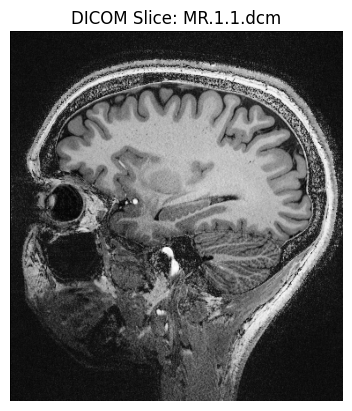

In [6]:
# Define the path to a DICOM file
# You can change this to any other file in the dicoms-unsorted/ directory
dcm_path = "./dicoms-unsorted/MR.1.2.276.0.7230010.3.1.3.0.4480.1677042698.772469.84.dcm"

# Read the DICOM file into a Python object
ds = pydicom.dcmread(dcm_path)

# ----------------------------
# Inspecting DICOM metadata (optional)
# ----------------------------

# Print a few key metadata fields (can be useful for QC or orientation)
print("Patient ID:", ds.get("PatientID", "N/A"))
print("Modality:", ds.get("Modality", "N/A"))
print("Study Date:", ds.get("StudyDate", "N/A"))

# ----------------------------
# Visualizing the DICOM image
# ----------------------------

# Display the image stored in the DICOM file using matplotlib
# Note: Some DICOM files (e.g., non-image series) may not contain pixel data
plt.imshow(ds.pixel_array, cmap=plt.cm.gray) # Use grayscale color map
plt.title("DICOM Slice: MR.1.1.dcm") # Title of the plot
plt.axis("off") # Hide axis ticks/labels for cleaner view
plt.show()

## Analysis

*Be sure to annotate your example. You can also add Markdown blocs to provide explanations.*

In [8]:
!bet ./ds000102/sub-08/anat/sub-08_T1w.nii.gz sub-08_T1w_brain.nii.gz

## Results

In [9]:
from ipyniivue import NiiVue
nv = NiiVue()
nv.load_volumes([{"path": "sub-08_T1w_brain.nii.gz"}])
nv

NiiVue(height=300)